In [34]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np 
 
from matplotlib import pyplot as plt
import seaborn as sns


In [35]:
crime= pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [92]:
crime_data=crime.drop(("Unnamed: 0"),axis=1)
y=crime[['Unnamed: 0']]

In [37]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [38]:
crime_data.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [39]:
crime_data.shape

(50, 4)

In [40]:
crime_data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [42]:

crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [12]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# .......EDA.......

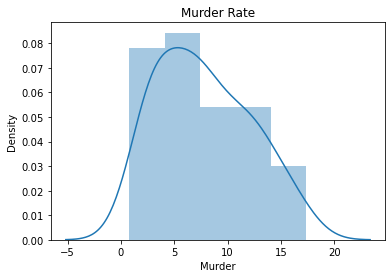

In [18]:
plt.title('Murder Rate')
sns.distplot(crime_data.Murder)
import warnings
warnings.filterwarnings('ignore')

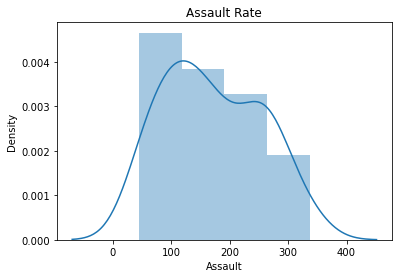

In [19]:
plt.title('Assault Rate')
sns.distplot(crime_data.Assault)
import warnings
warnings.filterwarnings('ignore')

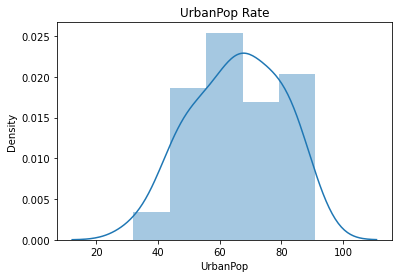

In [22]:
plt.title('UrbanPop Rate')
sns.distplot(crime_data.UrbanPop)
import warnings
warnings.filterwarnings('ignore')

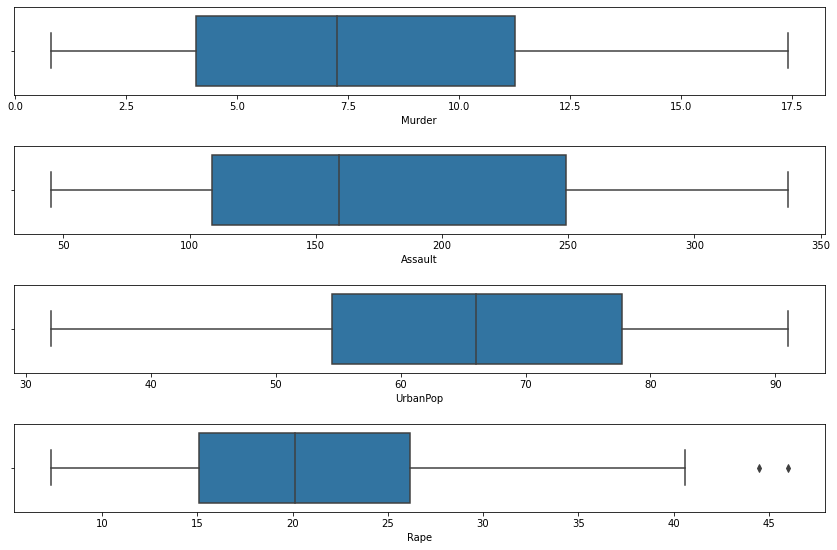

In [24]:
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=crime_data,ax=axes[0])
sns.boxplot(x='Assault',data=crime_data,ax=axes[1])
sns.boxplot(x='UrbanPop',data=crime_data,ax=axes[2])
sns.boxplot(x='Rape',data=crime_data,ax=axes[3])
plt.tight_layout(pad=2.0)
     

<AxesSubplot:xlabel='Rape'>

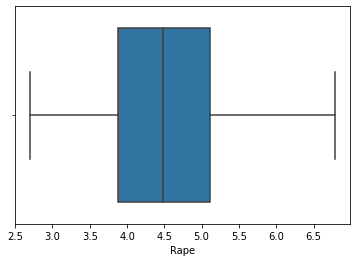

In [25]:
import numpy as np
sns.boxplot(np.sqrt(crime_data.Rape))

In [26]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


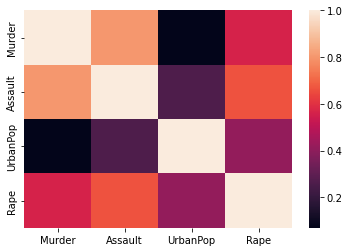

In [27]:

sns.heatmap(crime_data.corr())
plt.show()

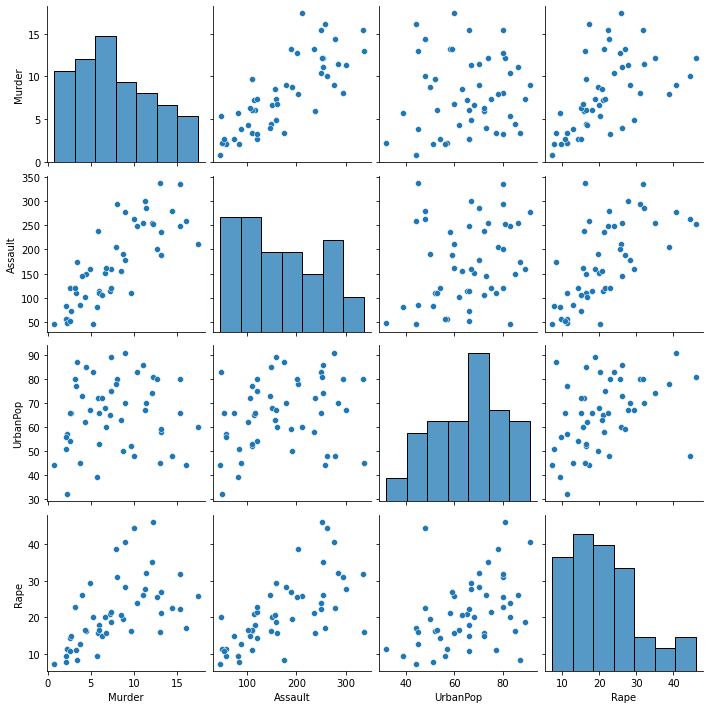

In [28]:
sns.pairplot(crime_data)

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= crime.drop(['Unnamed: 0'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape
     


(50, 4)

In [45]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape
     

(50, 4)

# HIERARCHICAL 

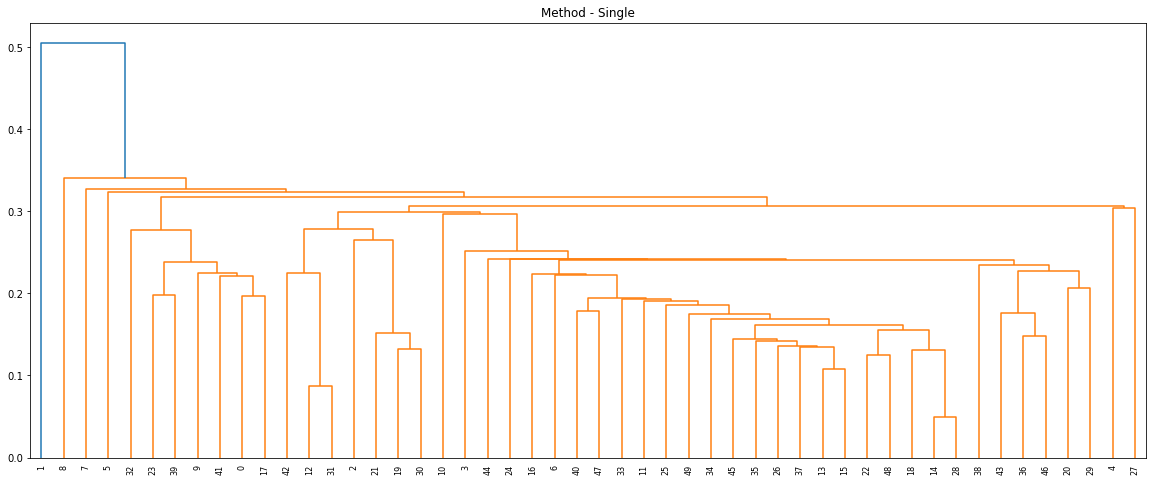

In [47]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single")
plt.show()

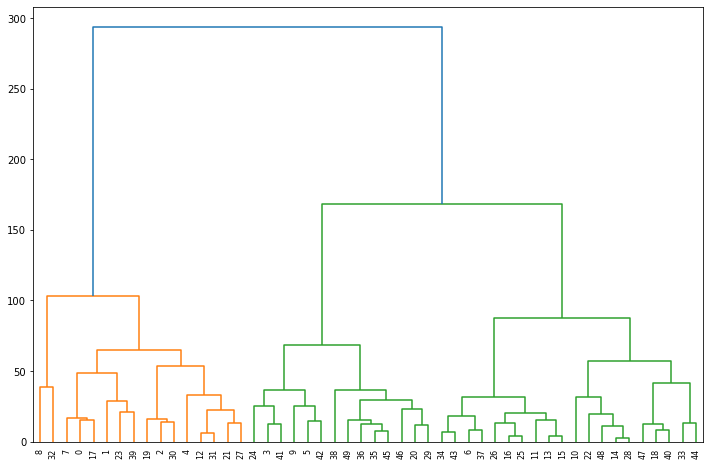

In [48]:
plt.figure(figsize=(12,8))
dendrograms=sch.dendrogram(sch.linkage(crime_data,'complete'))

In [49]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=5)

In [50]:
y_hc=hc.fit_predict(crime_data)
y_hc

array([1, 3, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,3
2,1
3,0
4,1
5,0
6,0
7,1
8,2
9,0


In [103]:

crime_data['Clusters'] = Clusters
Clusters.value_counts()

Clusters
0           34
1           13
2            1
3            1
4            1
dtype: int64

In [104]:


crime_data.groupby('Clusters').agg(['mean']).reset_index()


,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.894118,122.852941,64.235294,17.870588
1,1,11.584615,263.538462,70.769231,27.807692
2,2,15.400000,335.000000,80.000000,31.900000
3,3,10.000000,263.000000,48.000000,44.500000
4,4,13.000000,337.000000,45.000000,16.100000


In [58]:
crime_data['clusters']=Clusters

In [59]:
crime_data['clusters']

0     1
1     3
2     1
3     0
4     1
5     0
6     0
7     1
8     2
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    4
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: clusters, dtype: int64

In [60]:
crime_data[crime_data['clusters']==2]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters
8,15.4,335,80,31.9,2,2


In [61]:
crime_data[crime_data['clusters']==4]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters
32,13.0,337,45,16.1,4,4


In [62]:
crime_data[crime_data['clusters']==1]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters
0,13.2,236,58,21.2,1,1
2,8.1,294,80,31.0,1,1
4,9.0,276,91,40.6,1,1
7,5.9,238,72,15.8,1,1
12,10.4,249,83,24.0,1,1
17,15.4,249,66,22.2,1,1
19,11.3,300,67,27.8,1,1
21,12.1,255,74,35.1,1,1
23,16.1,259,44,17.1,1,1
27,12.2,252,81,46.0,1,1


# KMeans....

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [64]:
#standardization function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_crime_data=scaler.fit_transform(crime.iloc[:,1:])
print(scaler_crime_data)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [65]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaler_crime_data)
    wcss.append(kmeans.inertia_)
    import warnings
    warnings.filterwarnings('ignore')

In [66]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.990529821335684,
 44.452302957970545,
 39.68026559667293,
 34.68738839784909,
 32.46090824767275,
 27.550963499449402]

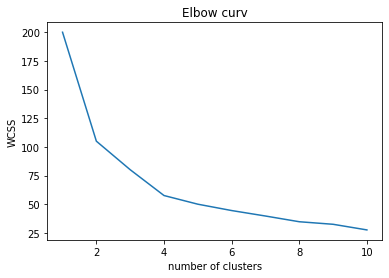

In [67]:
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
cluster_new=KMeans(n_clusters=2,random_state=16)

cluster_new.fit(scaler_crime_data)

KMeans(n_clusters=2, random_state=16)

In [69]:
cluster_new.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [106]:
crime_data['clusterid_new']=cluster_new.labels_

In [107]:
crime_data['clusterid_new']

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    0
25    1
26    1
27    0
28    1
29    1
30    0
31    0
32    0
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    0
42    0
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: clusterid_new, dtype: int32

In [108]:
cluster_new.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

In [109]:
crime_data.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Clusters
,mean,mean,mean,mean,mean
clusterid_new,,,,,
0,12.165,255.250000,68.400000,29.165000,1.050000
1,4.870,114.433333,63.633333,15.943333,0.033333


In [110]:
crime_data[crime_data['clusterid_new']==0]

,Murder,Assault,UrbanPop,Rape,Clusters,clusterid_new
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,3,0
2,8.1,294,80,31.0,1,0
4,9.0,276,91,40.6,1,0
5,7.9,204,78,38.7,0,0
8,15.4,335,80,31.9,2,0
9,17.4,211,60,25.8,0,0
12,10.4,249,83,24.0,1,0
17,15.4,249,66,22.2,1,0
19,11.3,300,67,27.8,1,0


In [112]:
crime_data[crime_data['clusterid_new']==1]

,Murder,Assault,UrbanPop,Rape,Clusters,clusterid_new
3,8.8,190,50,19.5,0,1
6,3.3,110,77,11.1,0,1
7,5.9,238,72,15.8,1,1
10,5.3,46,83,20.2,0,1
11,2.6,120,54,14.2,0,1
13,7.2,113,65,21.0,0,1
14,2.2,56,57,11.3,0,1
15,6.0,115,66,18.0,0,1
16,9.7,109,52,16.3,0,1
18,2.1,83,51,7.8,0,1


# DBSCAN

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
crime_data.min()

Murder            0.8
Assault          45.0
UrbanPop         32.0
Rape              7.3
h_clusterid       0.0
clusters          0.0
clusterid_new     0.0
dtype: float64

In [80]:
crime_data.max()

Murder            17.4
Assault          337.0
UrbanPop          91.0
Rape              46.0
h_clusterid        4.0
clusters           4.0
clusterid_new      1.0
dtype: float64

In [81]:
crime_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Murder         50 non-null     float64
 1   Assault        50 non-null     int64  
 2   UrbanPop       50 non-null     int64  
 3   Rape           50 non-null     float64
 4   h_clusterid    50 non-null     int64  
 5   clusters       50 non-null     int64  
 6   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 2.7 KB


In [82]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters,clusterid_new
0,13.2,236,58,21.2,1,1,0
1,10.0,263,48,44.5,3,3,0
2,8.1,294,80,31.0,1,1,0
3,8.8,190,50,19.5,0,0,1
4,9.0,276,91,40.6,1,1,0


In [83]:
crime_data_1=crime_data.drop(("clusterid_new"),axis=1)
crime_data_1

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,3,3
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,0,0
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,2,2
9,17.4,211,60,25.8,0,0


In [84]:
array=crime_data_1.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   3. ,   3. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   0. ],
       [ 11.3, 300. ,  67. ,  2

In [85]:
stdscaler = StandardScaler().fit(array)
x = stdscaler.transform(array)

In [86]:
x

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03,  6.96526033e-01,  6.96526033e-01],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  3.18411901e+00,  3.18411901e+00],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00,  6.96526033e-01,  6.96526033e-01],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -5.47270455e-01, -5.47270455e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00,  6.96526033e-01,  6.96526033e-01],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -5.47270455e-01, -5.47270455e-01],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -5.47270455e-01, -5.47270455e-01],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01,  6.96526033e-01,  6.96526033e-01],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [87]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1.2)

In [88]:

dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [89]:
clust=pd.DataFrame(dbscan.labels_,columns=['cluster_1'])
clust.head()

,cluster_1
0,-1
1,-1
2,-1
3,0
4,-1


In [93]:
crime_data_2=crime_data_1.drop(["clusters","clusters"],axis=1)
crime_data_2

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [94]:
crime_data_2 = pd.concat([crime_data_2,clust],axis=1)
crime_data_2.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster_1
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,3,-1
2,8.1,294,80,31.0,1,-1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,1,-1


In [ ]:
#crime['clusterid_new']=dbscan.labels_
#crime

In [102]:
crime_data_2.groupby('cluster_1').agg(['mean']).reset_index()

,cluster_1,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,-1,11.973684,261.263158,67.894737,28.705263,1.157895
1,0,5.222581,115.290323,64.096774,16.651613,0.000000


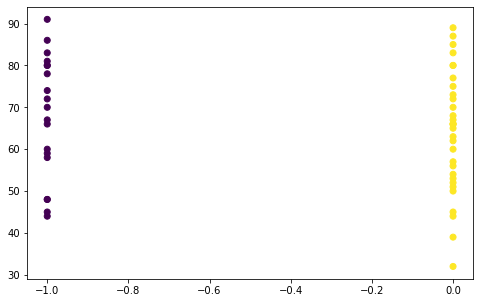

In [96]:
# Plot Clusters
plt.figure(figsize=(8, 5))  
plt.scatter(crime_data_2['cluster_1'],crime_data_2['UrbanPop'],c=dbscan.labels_)
plt.show()

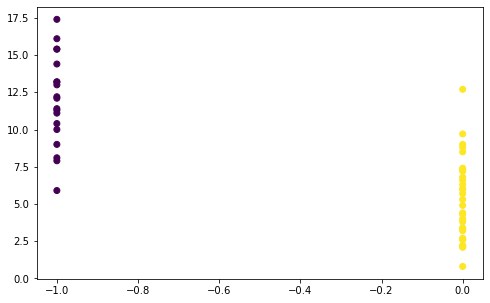

In [98]:
plt.figure(figsize=(8, 5))  
plt.scatter(crime_data_2['cluster_1'],crime_data_2['Murder'],c=dbscan.labels_)
plt.show()

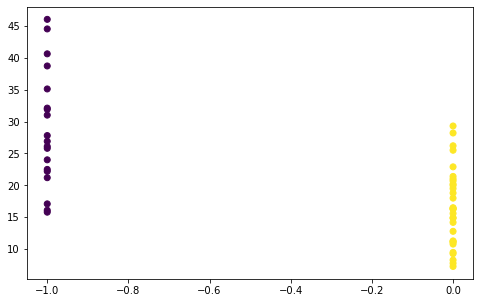

In [101]:
plt.figure(figsize=(8, 5))  
plt.scatter(crime_data_2['cluster_1'],crime_data_2['Rape'],c=dbscan.labels_)
plt.show()